In [121]:
import PoisDenoiser

import torch as th
import numpy as np
from time import time, sleep
from PoisDenoiser.utils import show_images as show, psnr
from PoisDenoiser.dataset_loader import BSDS500
import PGM

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


119082_1_maxval=1dot5
psnr : 4.289


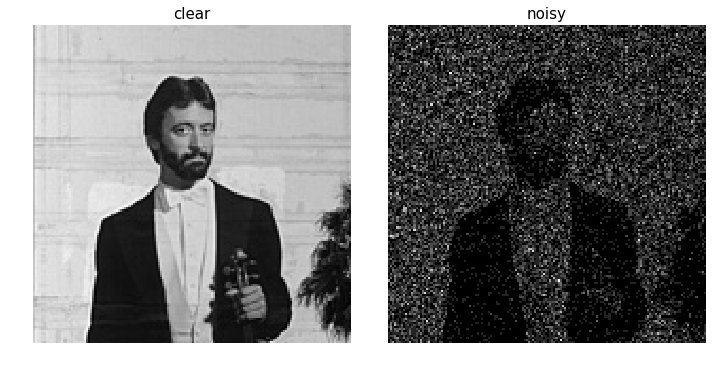

In [122]:
img_ind = 10
path2dataset = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
BSDSval = BSDS500(path2dataset+'val/', get_name=True)
    
clear, noisy, name = BSDSval[img_ind]

clear.unsqueeze_(0), noisy.unsqueeze_(0);

slice_ = (slice(0,1),
          slice(0,1),
          slice(50, 200),
          slice(150,300))
clear = clear[slice_].clone()
noisy = noisy[slice_].clone()

print(name)
images = [clear, noisy]
titles = ['clear', 'noisy']

show(images, titles)
print('psnr : {:.3f}'.format(psnr(clear, noisy)))

In [123]:
reg = PGM.reg_TV1_1_grad
# reg = PGM.reg_TV1_2_grad

if reg == PGM.reg_TV1_1_grad:
    lr0 = 0.05
    k = 0.01
    num_epochs = 25
        
elif reg == PGM.reg_TV1_2_grad:
    lr0 = 5
    k = 0.01
    num_epochs = 25
    
# stdn=0.65

In [124]:
start = time() 
img_estim_pois, psnrs_pois = PGM.do_denoise(noisy, reg=reg, \
                                 ref_image=clear, \
                                 num_epochs=num_epochs, \
                                 out_psnrs=True, \
                                 lr0_k=(lr0, k),\
                                 prox_type='pois')

print('time pois: ', np.float64(time()-start).round(2))

start = time()
img_estim_noprox, psnrs_noprox = PGM.do_denoise(noisy, reg=reg, \
                                 ref_image=clear, \
                                 num_epochs=num_epochs, \
                                 out_psnrs=True, \
                                 lr0_k=(lr0, k),\
                                 prox_type='no_prox')

print('time no_prox: ', np.float64(time()-start).round(2))


 52%|█████▏    | 13/25 [00:00<00:00, 127.84it/s]

time pois:  2.0


100%|██████████| 25/25 [00:00<00:00, 102.47it/s]

time no_prox:  0.25


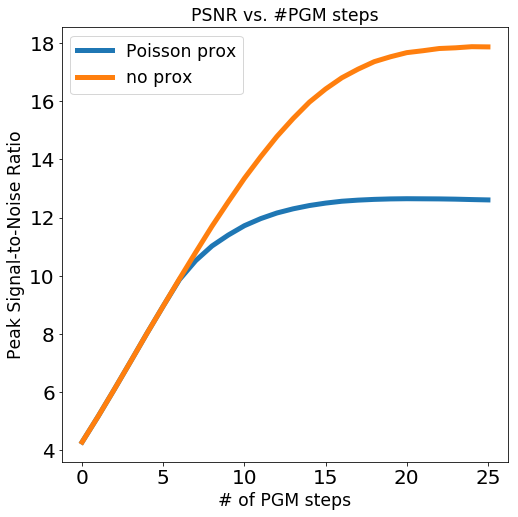

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(psnrs_pois, label='Poisson prox', linewidth=5.0)
ax.plot(psnrs_noprox, label='no prox', linewidth=5.0)
plt.xlabel('# of PGM steps', fontsize='xx-large')
plt.ylabel('Peak Signal-to-Noise Ratio', fontsize='xx-large')
plt.legend(fontsize = 'xx-large')
ax.set_title('PSNR vs. #PGM steps', fontsize='xx-large');
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


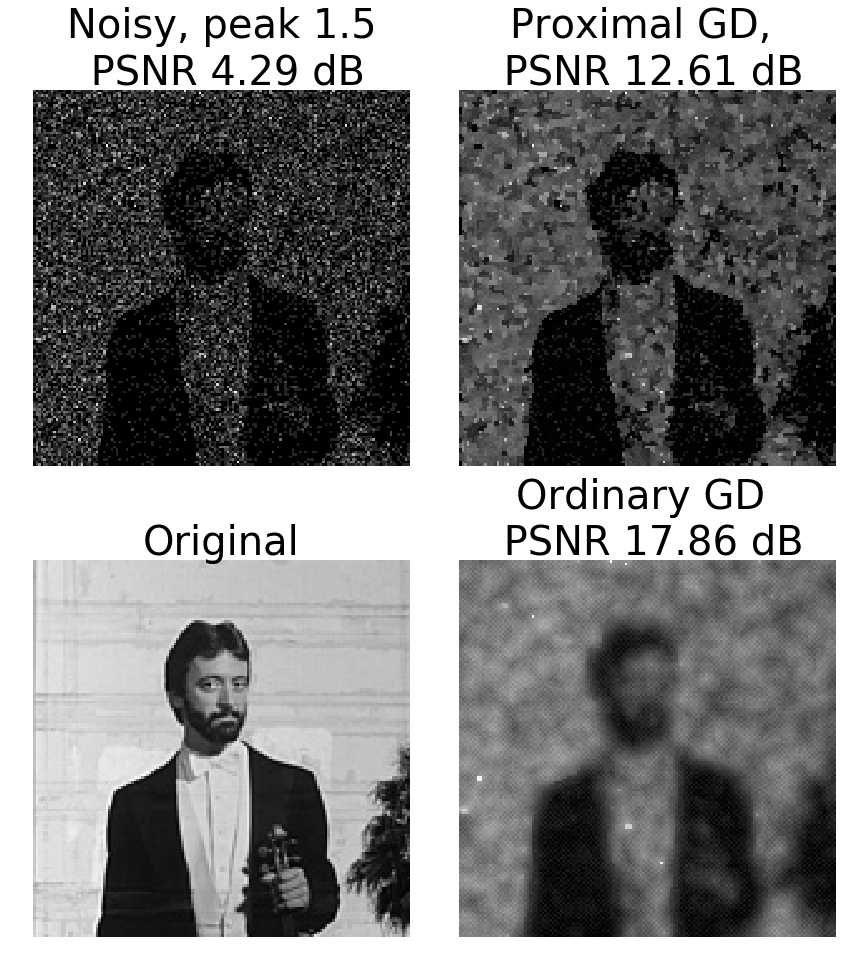

In [127]:
from PoisDenoiser.utils import showimages4 as show4, psnr
%load_ext autoreload
%autoreload 2

psnr_noisy = psnr(clear, noisy)
psnr_pois = psnr(clear, img_estim_pois)
psnr_noprox = psnr(clear, img_estim_noprox)
show4([noisy, img_estim_pois, clear, img_estim_noprox],
     ['Noisy, peak 1.5\n PSNR {:.2f} dB'.format(psnr_noisy),
     'Proximal GD, \n PSNR {:.2f} dB'.format(psnr_pois),
      'Original',
     'Ordinary GD \n PSNR {:.2f} dB'.format(psnr_noprox)])

